<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

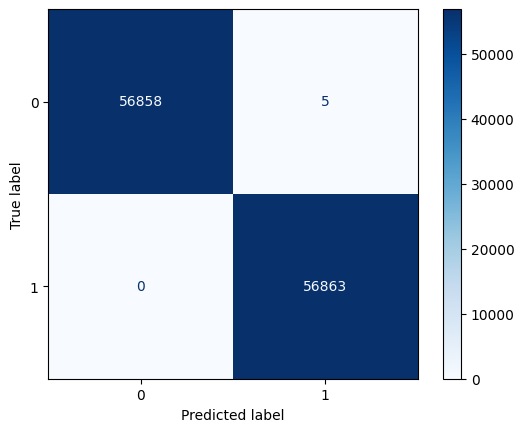

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Load data
data = pd.read_csv('creditcard.csv')

# Display basic information about the dataset
print(data.info())
print(data.describe())

# Feature scaling
scaler = StandardScaler()

# Scaling 'Time' and 'Amount'
data[['Time', 'Amount']] = scaler.fit_transform(data[['Time', 'Amount']])

# Split the dataset into features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Handling class imbalance
# Using Random Over Sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the resampled data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Display the shapes of the training and testing sets
print()
print(f'Training set shape: {X_train.shape}')
print(f'Testing set shape: {X_test.shape}')

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Measure the time taken to train the model
start_time = time.time()
clf.fit(X_train, y_train)
end_time = time.time()

print()
training_time = end_time - start_time
print(f'Time taken to train the model: {training_time:.2f} seconds')

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print()
print(f'Training Accuracy: {train_accuracy}')
print(f'Training Precision: {train_precision}')
print(f'Training Recall: {train_recall}')
print(f'Training F1 Score: {train_f1}')

print()
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print()

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Calculate training set predictions and metrics
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Function to predict a new data row
def predict_new_data(input_data):
    # Convert the input data to a DataFrame
    input_df = pd.DataFrame([input_data], columns=X.columns)

    # Scale 'Time' and 'Amount'
    input_df[['Time', 'Amount']] = scaler.transform(input_df[['Time', 'Amount']])

    # Make prediction
    prediction = clf.predict(input_df)
    
    # Return the result
    return prediction[0]


In [34]:
# Prompt user to enter new data for prediction
#152225
#543

input_str = input('Enter the new data for prediction (tab-separated values): ')
input_data = list(map(float, input_str.split('\t')))

# Ensure the input data length matches the number of features
if len(input_data) != X.shape[1]:
    print(f'Error: Expected {X.shape[1]} values, but got {len(input_data)} values.')
else:
    # Predict the class for the new data
    prediction = predict_new_data(input_data)
    print()
    if prediction==1:
        print(f"Predicted Class : {prediction}")
        print(f'The Transaction is Fraudulent')
    else:
        print(f"Predicted Class : {prediction}")
        print(f'The Transaction is Genuine')

Enter the new data for prediction (tab-separated values):  406	-2.312226542	1.951992011	-1.609850732	3.997905588	-0.522187865	-1.426545319	-2.537387306	1.391657248	-2.770089277	-2.772272145	3.202033207	-2.899907388	-0.595221881	-4.289253782	0.38972412	-1.14074718	-2.830055675	-0.016822468	0.416955705	0.126910559	0.517232371	-0.035049369	-0.465211076	0.320198199	0.044519167	0.177839798	0.261145003	-0.143275875	0



Predicted Class : 1
The Transaction is Fraudulent
